In [2]:
import sys
sys.path.append('../tgl')
sys.path.append('../')
import os
os.chdir('../tgl')

In [4]:
from tgl.model import TemporalGraphModel

In [5]:
import numpy as np

tgm = TemporalGraphModel('LICHESS', 'config/TGN.yml', 'models/LICHESS_1678622339.542418.pkl', supervised = True)
node_count = tgm.node_count()
all_nodes = np.arange(0, node_count, dtype = int)
ts = np.repeat(tgm.timestamps().max(), len(all_nodes))

In [6]:
emb = tgm.get_node_emb(all_nodes, ts)
emb

tensor([[ 0.1018,  0.5060, -0.8064,  ..., -0.8321, -0.7557,  2.9611],
        [ 1.5632, -0.0541, -0.8694,  ..., -0.8958, -0.8176,  2.4450],
        [-0.4760,  1.4681, -0.6809,  ..., -0.7049, -0.6321,  2.6827],
        ...,
        [ 1.6870,  2.3140, -0.7184,  ..., -0.7428, -0.6690, -0.1029],
        [ 0.7970,  1.7736, -0.9614,  ..., -0.9891, -0.9082,  1.9265],
        [ 2.5938,  0.7186, -0.9256,  ..., -0.9529, -0.8731,  0.7016]])

In [7]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca

PCA(n_components=2)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [9]:
pca.fit(emb)
emb_pca = pca.transform(emb)
emb_pca.shape

(4977, 2)

In [1]:
import os
os.chdir("../../")
os.getcwd()

'/home/florinacho'

In [2]:
from deepskill.utils.player_statistics import PlayerStatistics

file = 'deepskill/data/processed/lichess_db_standard_rated_2013-02.csv'

ps = PlayerStatistics(file)

elos = [ps.final_elo(username) for username in ps.players()]

#elo = np.asarray(elo[:-1])
#elo_norm = (elo-np.min(elo[elo != 0]))/(np.max(elo)-np.min(elo[elo != 0]))
#elo_norm

Reading CSV...
Processing time...
Factoring players...
Iterating rows...
Statistics ready!


In [6]:
from statistics import mean
elo = [mean(elo.values()) for elo in elos]
len(elo)

4958

TypeError: PlayerStatistics.__init__() takes 1 positional argument but 2 were given

In [37]:
match_count = list(map(lambda d: d['matches'], stats))
match_count = np.asarray(match_count[:-1])
match_count

NameError: name 'stats' is not defined

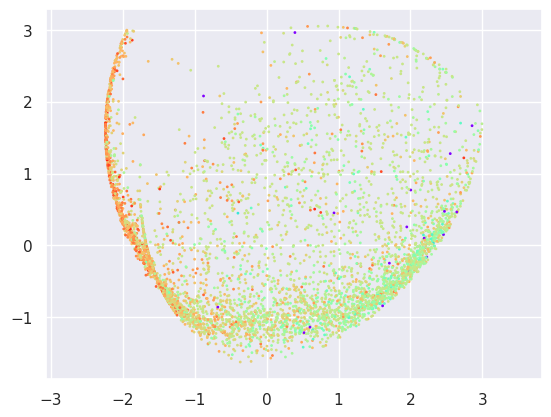

In [22]:
plt.scatter(emb_pca[:, 0], emb_pca[:, 1], c=elo_norm, s=1, cmap='rainbow')
plt.axis('equal');

/tmp/ipykernel_369/2529056314.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(emb_pca[:, 0], emb_pca[:, 1], c=np.log(match_count), s=1, cmap='rainbow')


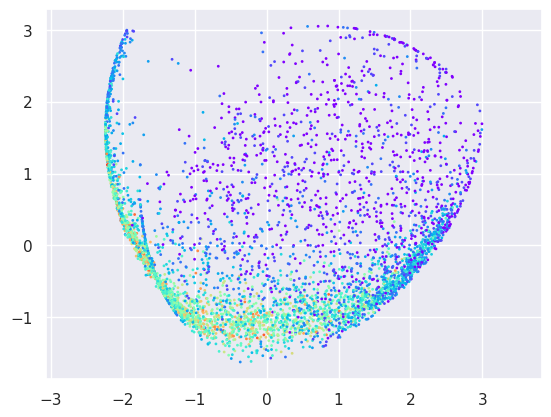

In [23]:
plt.scatter(emb_pca[:, 0], emb_pca[:, 1], c=np.log(match_count), s=1, cmap='rainbow')
plt.axis('equal');

In [24]:
from sklearn.manifold import TSNE

emb_tsne = TSNE(n_components=2, learning_rate='auto',
                init='random', perplexity=30).fit_transform(emb)
emb_tsne.shape

(4977, 2)

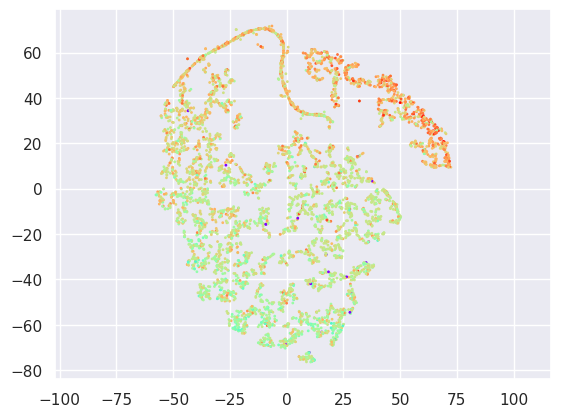

In [25]:
plt.scatter(emb_tsne[:, 0], emb_tsne[:, 1], c=elo_norm, s = 1, cmap='rainbow')
plt.axis('equal');

/tmp/ipykernel_369/3609409407.py:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(emb_tsne[:, 0], emb_tsne[:, 1], c=np.log(match_count), s = 1, cmap='rainbow')


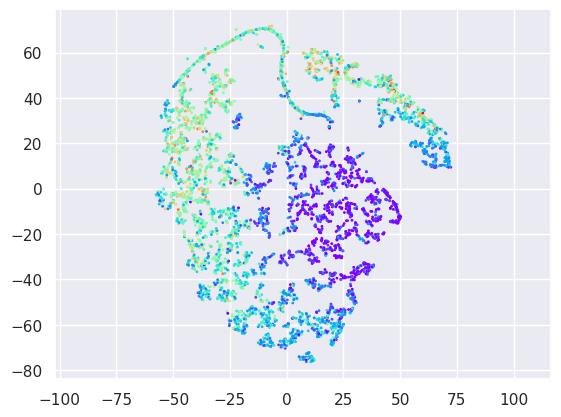

In [26]:
plt.scatter(emb_tsne[:, 0], emb_tsne[:, 1], c=np.log(match_count), s = 1, cmap='rainbow')
plt.axis('equal');